**APLICACION DE T-SNE**

IMPORTAR LIBRERIAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

**Cargar y preprocesar el dataset de dígitos**

Cargamos un dataset de imágenes de dígitos escritos a mano desde scikit-learn y escalamos los datos con StandardScaler para normalizar las características y mejorar el rendimiento de T-SNE. Esto ayuda a que los algoritmos de machine learning funcionen de manera más eficiente al tener los datos en la misma escala.


In [2]:
from sklearn.datasets import load_digits

# Cargar el dataset de dígitos
digits = load_digits()
X = digits.data  # Características (imágenes aplanadas)
y = digits.target  # Etiquetas (dígitos del 0 al 9)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Aplicar PCA **

Aplicamos el algoritmo PCA (Análisis de Componentes Principales) para reducir las dimensiones a 50 componentes. Esta reducción previa es opcional, pero ayuda a que T-SNE trabaje de manera más eficiente al reducir la cantidad de características que necesita procesar. En este caso, PCA conserva la mayor parte de la variabilidad de los datos mientras reduce las dimensiones.

In [3]:
# Aplicar PCA para reducir dimensiones a 50
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)


**Aplicar T-SNE en 3D**

Usamos el algoritmo T-SNE configurado para reducir a 3 dimensiones (n_components=3). Este algoritmo toma los datos transformados por PCA (o directamente los datos escalados si no usas PCA) y los proyecta en un espacio 3D donde se conservan las relaciones de similitud entre las muestras. T-SNE es útil para identificar patrones y agrupaciones en datos de muchas dimensiones.

In [4]:
# Aplicar T-SNE para reducir a 3 dimensiones
tsne = TSNE(n_components=3, perplexity=30, n_iter=300, random_state=42)
X_tsne_3d = tsne.fit_transform(X_pca)  # Usando los datos reducidos por PCA


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


**Visualización en 3D**

Utilizamos la función scatter de matplotlib en un entorno 3D (Axes3D) para mostrar cómo los diferentes puntos del dataset (cada imagen de dígito) se proyectan en el espacio tridimensional. Los puntos están coloreados de acuerdo a su etiqueta (el dígito que representan), lo que permite identificar visualmente cómo se agrupan las clases similares. La barra de colores permite identificar qué colores corresponden a cada dígito.

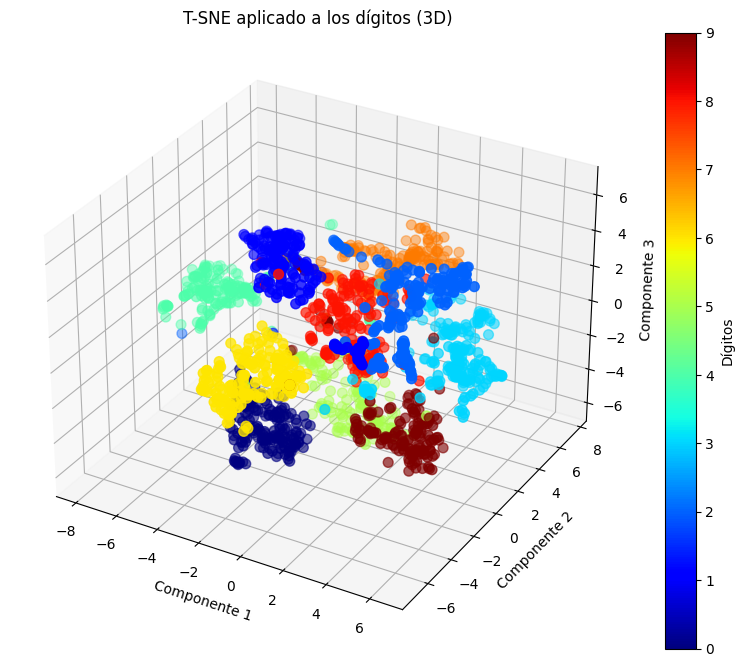

In [5]:
# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear el gráfico 3D de los datos proyectados por T-SNE
scatter = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=y, cmap='jet', s=50)

# Agregar barra de colores
legend = fig.colorbar(scatter)
legend.set_label('Dígitos')

# Agregar títulos y etiquetas
ax.set_title('T-SNE aplicado a los dígitos (3D)')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

# Mostrar el gráfico
plt.show()
